### Import Relevant Libraries

In [2]:
# Import data processing and visualization libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import matplotlib

### Load the Dataset 

In [4]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 

# display the first few rows
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To be able to see all the column in the dataframe, i made use of the pandas function "set_option"

In [6]:
# to display all the columns in full
pd.set_option("display.max_columns", None)

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# check the size of the dataset  
data.shape

(7043, 21)

In [9]:
# check columns and their types 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


On observing the "TotalCharges" column, i discovered that the datatype for the column is 'object' instead of a numerical datatype such as 'int' or 'float'.

This could be caused by no data imputation, leading or trailing whitespaces or ommitted itentionally.

Hence, i look forward to correcting this before proceeding

In [11]:
# apply the "to_numeric" function to the column that replaces non numerical values with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
# display the rows with NaN values to find a pattern  
data[data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Upon observing, the columns all had one thing in common which is having '0' as their tenure.

The idea is that Total Charge is a product of Tenure and Monthly Charge. Since tenure is '0', this checks out

This could be to reasons such as a customer did not complete a month duration, yet the bill for the few days used pills up

Ideally, drop these values or perform data imputation based on reasonable decision 

My Decision: Data imputation by replacing the NaN values with '0.0'. Reason for this is that since these customers have no tenure, their Total Charge should still be zero

In [14]:
# replacing the missing values with 0.0
data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

In [15]:
# confirm changes made
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# check for missing values 
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dimensionality Reduction

The idea here is basically to check the unique values in each categorical columns so as to reduce the numbers of unique values especially when they mean the same or similar thing

In [18]:
# drop the 'customerID' column. It is a placeholder or identifier for each customer's data 
data = data.drop('customerID', axis=1)

# confirm operation 
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# displays columns
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
# create a variable for numerical columns
num_list = ["tenure", "MonthlyCharges", "TotalCharges"] 

# create a variable for categorical columns 
categ_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [21]:
# loop that gets unique values for each categorical column 
for col in data.columns:
  if col not in num_list:
    print(col, data[col].unique())
    print("."*50)

gender ['Female' 'Male']
..................................................
SeniorCitizen [0 1]
..................................................
Partner ['Yes' 'No']
..................................................
Dependents ['No' 'Yes']
..................................................
PhoneService ['No' 'Yes']
..................................................
MultipleLines ['No phone service' 'No' 'Yes']
..................................................
InternetService ['DSL' 'Fiber optic' 'No']
..................................................
OnlineSecurity ['No' 'Yes' 'No internet service']
..................................................
OnlineBackup ['Yes' 'No' 'No internet service']
..................................................
DeviceProtection ['No' 'Yes' 'No internet service']
..................................................
TechSupport ['No' 'Yes' 'No internet service']
..................................................
StreamingTV ['No' 'Yes' 'No internet 

On observing columns like 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', discovered that they all had 3 unique values but the third unique value can be closely tied to either 'No'. 

This decision made me replace such values with 'No' 

In [23]:
# create a variable for columns to reduce unique values
cols_to_simplify = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# this replaces such values with 'No'
for col in cols_to_simplify:
    data[col] = data[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [24]:
# confirm operation 
for col in data.columns:
  if col not in num_list:
    print(col, data[col].unique())
    print("."*50) 

gender ['Female' 'Male']
..................................................
SeniorCitizen [0 1]
..................................................
Partner ['Yes' 'No']
..................................................
Dependents ['No' 'Yes']
..................................................
PhoneService ['No' 'Yes']
..................................................
MultipleLines ['No' 'Yes']
..................................................
InternetService ['DSL' 'Fiber optic' 'No']
..................................................
OnlineSecurity ['No' 'Yes']
..................................................
OnlineBackup ['Yes' 'No']
..................................................
DeviceProtection ['No' 'Yes']
..................................................
TechSupport ['No' 'Yes']
..................................................
StreamingTV ['No' 'Yes']
..................................................
StreamingMovies ['No' 'Yes']
.......................................

### Explanatory Data Analysis  

The idea here is to focus on numerical columns by visualizing and using summary statistics

The column of consideration are Tenure, Monthly Charge and Total Charges

In [26]:
# summary statistics of the numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Next, make use of histograms to show the distribution of numerical columns

In [28]:
# function to plot histgram that takes dataframe name and the numerical column name as argument 
def plot_histogram(df, column_name):
    """
    Plots a histogram with a KDE curve for a specified numerical column in a DataFrame.

    The plot also includes vertical lines indicating the mean and median of the column.

    Parameters:
    ----------
    df : pandas.DataFrame
    The DataFrame containing the data.
    column_name : str
    The name of the numerical column to plot.

    Returns:
    -------
    None
    Displays the plot using matplotlib.
    """

    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # calculate the mean and median values for the columns
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.legend()
    plt.show()


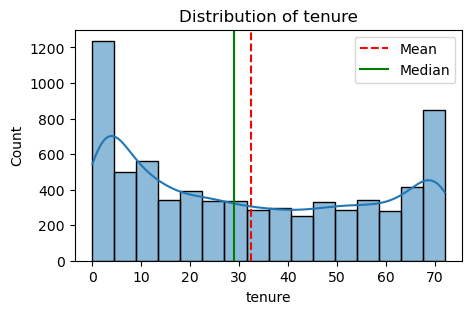

In [29]:
# histogram for tenure
plot_histogram(data, "tenure") 

On studying this plot, the distribution is right skewed since the mean is greater than the median. Also, the bulk of the data is concentrated on the left.

Since any of the model to use for this project is not affected by skewness, Standardizing is not necessary 

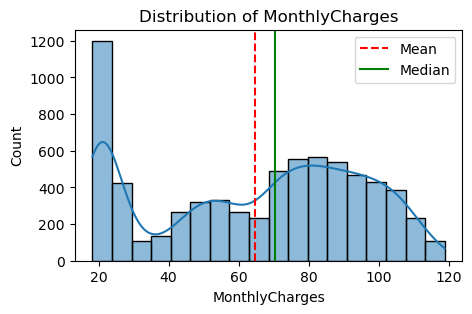

In [31]:
# histogram for monthly charges
plot_histogram(data, "MonthlyCharges") 

On studying this plot, the distribution slighly left skewed but since the meadian is greater than the mean, it confirms it is negatively skewed. 

Same logic applies to this, model to use for this project is not affected by skewness, Standardizing is not necessary 

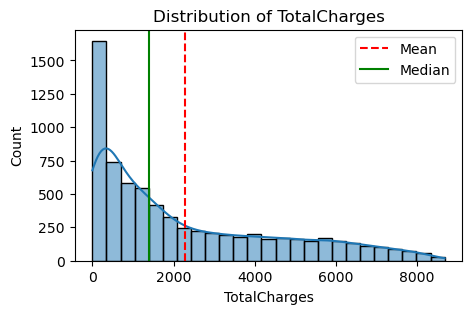

In [33]:
# histogram for total charges
plot_histogram(data, "TotalCharges")

On observing this plot, it is right skewed and since the mean is greater than the median, it also confirms it. 

Since any of the model to use for this project is not affected by skewness, Standardizing is not necessary 

### Outlier Detection 

The idea here is to use boxplot visualization to detect outliers 

In [36]:
# boxplot function
def plot_boxplot(df, column_name):
    """
    Plots a boxplot for a specified numerical column in a DataFrame.

    The boxplot helps visualize the potential outliers in the data.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    column_name : str
        The name of the numerical column to plot.

    Returns:
    -------
    None
        Displays the plot using matplotlib.
    """

    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show

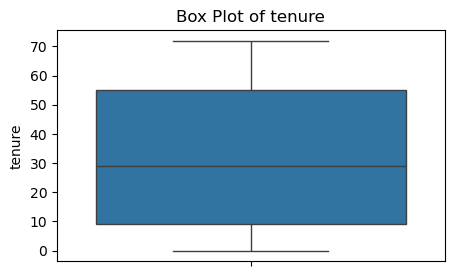

In [37]:
# boxplot for tenure
plot_boxplot(data, "tenure")

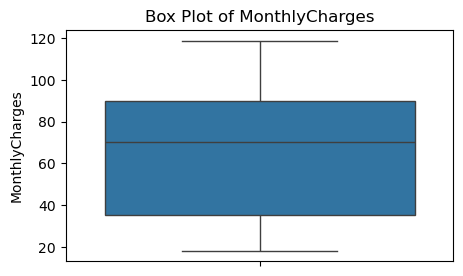

In [38]:
# boxplot for monthly charges
plot_boxplot(data, "MonthlyCharges")

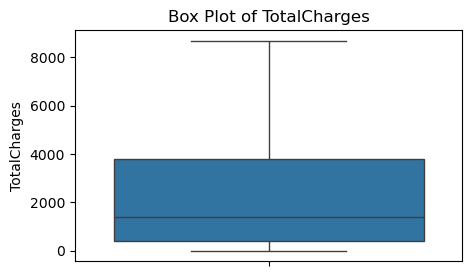

In [39]:
# boxplot for total charges
plot_boxplot(data, "TotalCharges")

The above boxplot visualizations shows that there are no outliers present in the numerical columns. This means that every value falls within the Q1 and Q3 range. 

### Correlation Function and Matrix

The idea here is to use a correlation function that tells the relationships between different columns in a dataframe wrt another column. 

The point of intrest is the correlation of the numerical columns wrt the target column ('Churn')

The correlation matrix is basically a heatmap that serves as a visualization

In [42]:
# convert the target to numerical values 
data["Churn"] = data["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\User\AppData\Local\Temp\ipykernel_13684\1436340596.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"] = data["Churn"].replace({"Yes": 1, "No": 0})


In [43]:
# confirm operation
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


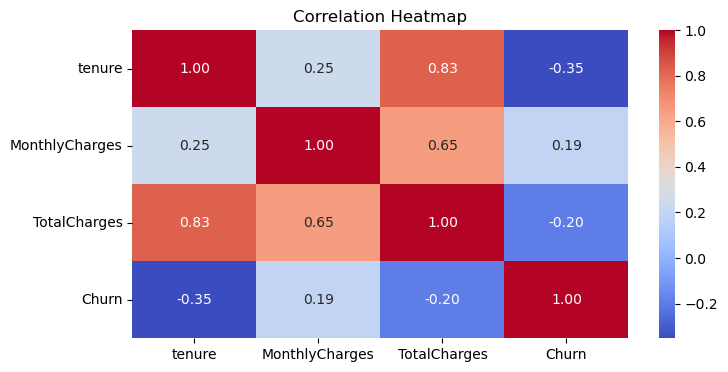

In [44]:
# correlation matrix and heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(data[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show() 

The heatmap displayed shows the correlation between the target and other numerical columns.

Positive values implies a positive relationship with the target while a negative values implies a negative 

Values closer to zero(e.g 0.0075, 0.035) has little to no correlation to the target 

### Label Encoding  

The idea here is to convert all the categorical columns before proceeding to build models. This is because models can only use numbers

In [47]:
# select columns with the object datatype
obj_columns = data.select_dtypes(include="object").columns

In [48]:
# confrm operation 
obj_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [49]:
# Import relevant Libraries 
from sklearn.preprocessing import LabelEncoder 
import pickle

In [50]:
# a loop that does label encoding for each of the object datatypes 
encoders = {} # initialize a dictionary to save the encoders

# apply label encoding and store the encoders
for column in obj_columns:
  label_encoder = LabelEncoder()
  data[column] = label_encoder.fit_transform(data[column])
  encoders[column] = label_encoder

In [51]:
# confirm operation 
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [52]:
# create a pickle file with the name encoders.pkl
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f) # writes the encoder dictionary to the pickle file 

In [53]:
# confirm encoding
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Train-Test Split

This involves spliting the data into train and test samples

In [55]:
# Declare Dependent(feature-X) and Independent variable(Target-y) 
X = data.drop(columns=["Churn"])
y = data["Churn"]

In [56]:
# examine the target unique values 
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [57]:
# import the train-test split from sklearn
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

On observing the target, the values are imbalanced so apply SMOTE to handle imbalanced sets. 

This means using SMOTE, generate synthetic number of values for the value with low occurrence so that it matches the number of the other value

### SMOTE (Synthetic Minority Oversampling Technique)

In [61]:
# import the SMOTE function from imblearn library
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(random_state=42) # creates an instance of the SMOTE class from the imblearn library

In [63]:
# apply SMOTE on the training data 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [64]:
# confirm new shape 
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

### Model Training

#### Hyper parameter optimization 

In [67]:
# import necessary models and evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV 

In [68]:
# initialize a dictionary to hold tuned models
tuned_models = {}

# initialize a dictionary to hold CV scores
cv_scores_tuned = {}

In [69]:
# Define parameter grids for random forest, decision trees and XGboost
param_distributions = {
    "Decision Tree": {
        "max_depth": [5, 10, 15, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]},
    
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2],
        "max_features": ["sqrt", "log2"]},
    
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        "subsample": [0.8, 1],
        "colsample_bytree": [0.8, 1]}
}

In [70]:
# declare base models 
base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [71]:
# Hyperparameter tuning and Cross-validation

# Loop through each base model to perform hyperparameter tuning
for model_name, model in base_models.items():
    print(f"Tuning {model_name}...")

      # Set up randomized search with cross-validation
    search = RandomizedSearchCV(
        estimator=model,                                     # The current model to tune
        param_distributions=param_distributions[model_name], # Corresponding hyperparameter grid
        n_iter=20,                                           # Number of random combinations to try
        scoring='accuracy',                                  # Metric to optimize
        cv=5,                                                # 5-fold cross-validation
        verbose=1,                                           # Print progress during search
        n_jobs=-1,                                           # Use all available CPU cores 
        random_state=42                                      # Reproducibility
    )

     # Fit the model to the SMOTE-balanced training set
    search.fit(X_train_smote, y_train_smote)

    # Save the best performing model after tuning
    best_model = search.best_estimator_
    tuned_models[model_name] = best_model

Tuning Decision Tree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [72]:
# checks the best parameters for the models
tuned_models

{'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42),
 'Random Forest': RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=300,
                        random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               device=None, early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, random_state=42, 

In [73]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [74]:
# Perform 5-fold cross-validation using the best tuned model
scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

# Store the cross-validation scores for later comparison
cv_scores_tuned[model_name] = scores

# Print the average accuracy across all folds for this model
print(f"{model_name} best cross-validation accuracy: {np.mean(scores):.2f}")
print("-" * 60)

XGBoost best cross-validation accuracy: 0.83
------------------------------------------------------------


In [75]:
#to display the raw scores
cv_scores_tuned 

{'XGBoost': array([0.72161836, 0.76072508, 0.89667674, 0.88700906, 0.89969789])}

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# initilize Dictionary to store predictions for each model
predictions = {}

# Evaluate each tuned model on the test set 
for model_name, model in tuned_models.items():
     # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Save predictions for potential future use 
    predictions[model_name] = y_pred  

    # Calculate and print accuracy score, conconfusion_matrix and Classification report
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print("Confsuion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7480
Confsuion Matrix:
 [[814 222]
 [133 240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1036
           1       0.52      0.64      0.57       373

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.76      1409

Random Forest Accuracy: 0.7686
Confsuion Matrix:
 [[851 185]
 [141 232]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.56      0.62      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

XGBoost Accuracy: 0.7835
Confsuion Matrix:
 [[870 166]
 [139 234]]
Classification Report:
               precision    recall  f1-score   support

      

In [77]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

On observation, it is clear that XGBoost model is the best 

so i save it to a pickle file

In [79]:
# selecting the best model from the turned model dictionary
best_model = tuned_models["XGBoost"]

# Package the model and its feature names into a dictionary
model_data = {
    "model": best_model,
    "feature_names": X_train.columns.tolist()
}

# Save it as a pickle file
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)